In [18]:
# import the relevant libraries
import requests
import json

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [51]:
from data_preparation import prepare_data

In [40]:
import warnings
warnings.filterwarnings('ignore')

##### Reading python File 

In [22]:
# Read pickled file
data = pd.read_pickle('cleaned_real_estate_data.pkl')

In [53]:
# Prepare the data
file_path = 'cleaned_real_estate_data.pkl'
data_dict = prepare_data(file_path)

In [55]:
# Access the prepared data
data = data_dict['data']
sold_by_age = data_dict['sold_by_age']
all_properties_by_price = data_dict['all_properties_by_price']
sold_properties_by_price = data_dict['sold_properties_by_price']
covariance = data_dict['covariance']
correlation = data_dict['correlation']
correlation_no_na = data_dict['correlation_no_na']


# Data Visualisation

## Deal Satisfaction Across Countries (Bar Chart)

1. To plot the deal satisfaction by country, we must first obtain the relevant data. There needs to be a breakdown of deal satisfaction by country. If you remember, we have done that ealier.
2. With the data we can create a bar chart with the following parameters: 
    - white background with a grid
    - size of the figure (12,6)
    - fitting color which is not the default one
    - rotated x ticks, with a font size of 13
    - y ticks, with a font size of 13
    - y label for the deal satisfaction (no need for an x label)
    - remove the top and the right border of the chart
    - save the newly created figure as a .png on your computer

In [60]:
# averages by country is already calculated, so I can take advantage of that
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.00000,229075.470000
Canada,917.382857,5.00000,274069.384286
Denmark,785.480000,1.00000,257183.480000
Germany,743.410000,5.00000,205098.210000
Mexico,1283.450000,3.00000,338181.180000
Russia,903.757500,2.50000,278828.835000
UK,739.480000,4.00000,220142.680000
USA,901.756545,3.49697,270708.407030
USA,887.565833,4.75000,261679.335000


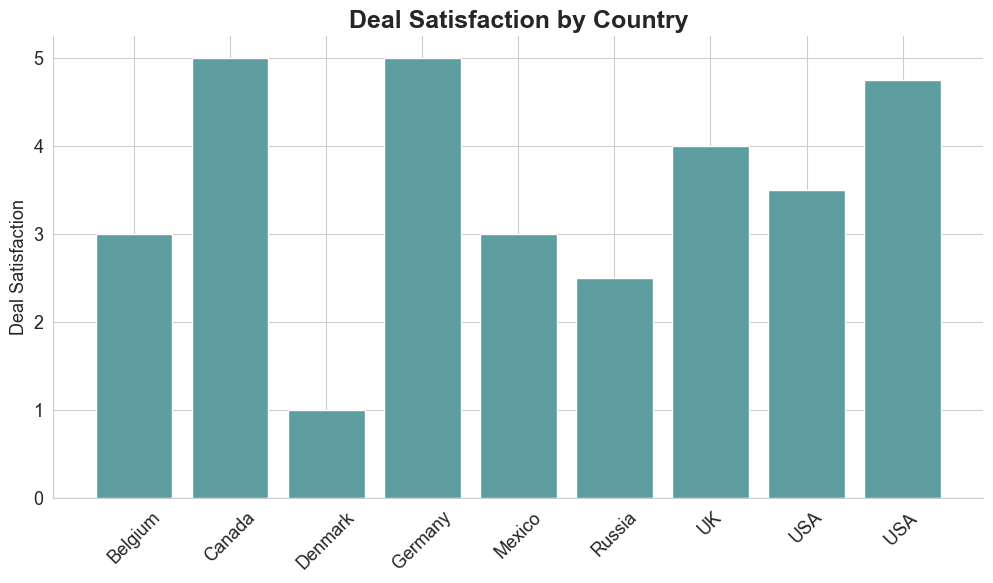

In [246]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) #determine the size of the chart

plt.bar(x = averages_by_country.index, #specify the x axis
        height = averages_by_country['deal_satisfaction'], #specify the y axis
        color = "#5f9ea0") # the color for the bars
# format the ticks
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") #add and format the title for the chart
plt.ylabel("Deal Satisfaction", fontsize = 13 ) #add a title for the y-axis

sns.despine() # removes the top and right border of our graph

plt.savefig("deal_satisfaction_by_country_bar_chart.png") # export chart as a picture

plt.show()

##  Customer Age Distribution (Histogram) (Histogram)

1. Тo visualize the distribution of customer ages at the time of purchase, we'll generate a histogram. The necessary data for this visualization is already included in the data variable.
2. Histogram construction: We use the <strong>data</strong> variable to create a histogram that represents the age distribution at purchase.The histogram should incorporate the following parameters:
    - white background with a grid
    - size of the figure (12,6)
    - 10 bins for the different categories
    - fitting color which is not the default one
    - appropriate x and y labels
    - remove the top and the right border of the chart
    - save the newly created figure as a .png on your computer

In [67]:
# let's get started by checking what our data is
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


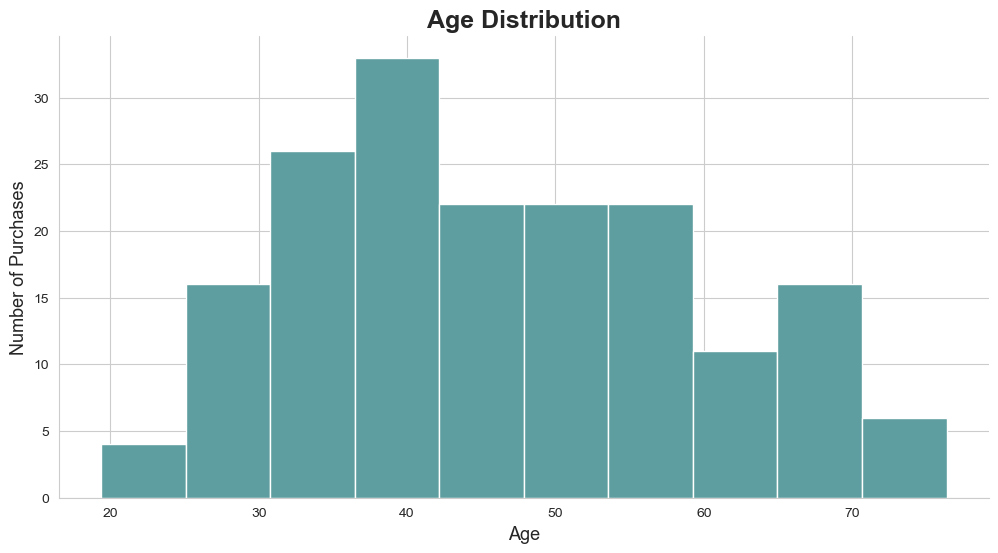

In [244]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) # determine the size of the figure

plt.hist(data['age_at_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#5f9ea0")
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine() # removes the top and right border of our graph

plt.savefig("age_distribution_histogram.png") # export chart as a picture

plt.show()

## Segmentation by State (Pareto diagram)

This is a Pareto diagram. The bars show the absolute frequency of each category. In this case this translates to: how many customers are there from each state. For example, there are 4 customers from Virginia.

The secondary axis (the orange line), shows the cumulative frequency. For example, California, Nevada, and Oregon together, account for 82% of all purchases. 

#### Reading data from previous Notebook

In [104]:
columns_of_interest = ['state', 'sold','mortgage']

In [106]:
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [109]:
totals_by_state.sold.sum()

181

In [112]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [115]:
data['state'] = np.where(data['state']=='', pd.NA, data['state'])
data['state'] = np.where(data['country']!='USA', pd.NA, data['state'])

In [118]:
# new result
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,106,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [121]:
totals_by_state.sold.sum()

165

In [125]:
columns_of_interest = ['state', 'sold']

In [130]:
sold_by_state = data[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
Arizona,9
California,106
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [134]:
# sort the values in descending order. This will place the states with the highest sales on top.
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
California,106
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [138]:
# The term 'sold' may not be the best to describe frequency, so I rename this column.
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,106
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


### Relative frequency distribution by State

In [142]:
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,106,0.642424
Nevada,17,0.103030
Colorado,11,0.066667
Oregon,11,0.066667
Arizona,9,0.054545
Utah,5,0.030303
Virginia,4,0.024242
Kansas,1,0.006061
Wyoming,1,0.006061


In [144]:
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,106,0.642424,0.642424
Nevada,17,0.103030,0.745455
Colorado,11,0.066667,0.812121
Oregon,11,0.066667,0.878788
Arizona,9,0.054545,0.933333
Utah,5,0.030303,0.963636
Virginia,4,0.024242,0.987879
Kansas,1,0.006061,0.993939
Wyoming,1,0.006061,1.000000


In [148]:
# this table already exists
sold_by_state

# it has also been sorted by frequency

,frequency,relative_frequency,cumulative_frequency
state,,,
California,106,0.642424,0.642424
Nevada,17,0.103030,0.745455
Colorado,11,0.066667,0.812121
Oregon,11,0.066667,0.878788
Arizona,9,0.054545,0.933333
Utah,5,0.030303,0.963636
Virginia,4,0.024242,0.987879
Kansas,1,0.006061,0.993939
Wyoming,1,0.006061,1.000000


In [74]:
# import the relevant library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

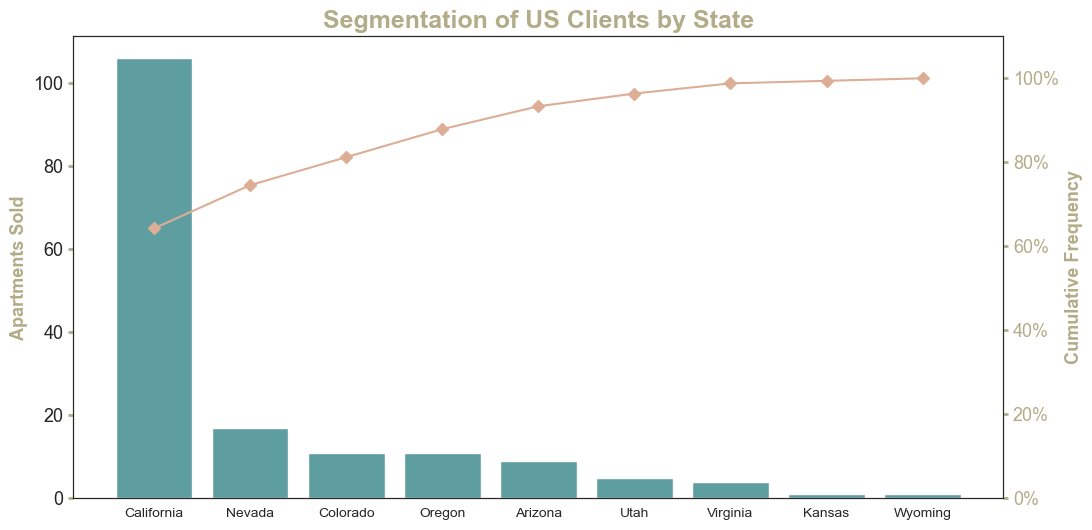

In [242]:
# Setting the seaborn style to "white" for aesthetic reasons - to override the default matplotlib style, removing the grey background and grid for a cleaner look.

sns.set_style("white") 

# To create the Pareto diagram, first initiate a figure with two axes.
fig, ax = plt.subplots(figsize = (12, 6))

# The first part of the visualization is a bar chart, featuring the 'sold_by_state' index on the x-axis and the frequency on the y-axis.
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#5f9ea0")
# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold", 
              weight='bold',
              fontsize = 13,
              color = "#b2ac88")
# Formatting the y-axis ticks.
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#b2ac88")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of the visualization is a line chart sharing the x-axis with the bar chart, and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"], 
         color = "#dcae96", 
         marker = "D")
# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency", 
               color = "#b2ac88", 
               weight = "bold",
               fontsize=13)
# Formatting the y-axis ticks.
ax2.tick_params(axis = "y", 
                colors = "#b2ac88", 
                width = 2, 
                labelsize = 13)

# Adding a descriptive and engaging title to our visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#b2ac88")

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 

# Displaying the final visualization.
plt.show()

## Total Sales per Year (Line chart)

In [153]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [155]:
# The 'date_sale' column is currently in datetime format.
# To manipulate this data for our purposes, we need to convert the year portion of the date into an integer.
data['date_sale'][0].year

2005

In [157]:
# the same for the whole series and save the year in a separate column
data['year_sale'] = data['date_sale'].apply(lambda x: x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [159]:
# convert the 'year_sale' variable type from float to int as fractional years don't accurately represent our data.
data['year_sale'] = data['year_sale'].fillna(0).astype(int)

# convert all zeros back to NA, restoring the dataset's missing value representation.
data['year_sale'] = data['year_sale'].replace({0:pd.NA})

In [161]:
# formulate the desired sales breakdown by year.
# We choose the columns of interest, 'year_sale' and 'price$', and sum all sales for each year.
columns_of_interest = ['year_sale','price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

# rename the 'price$' column to 'revenue$'for clarity.
revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


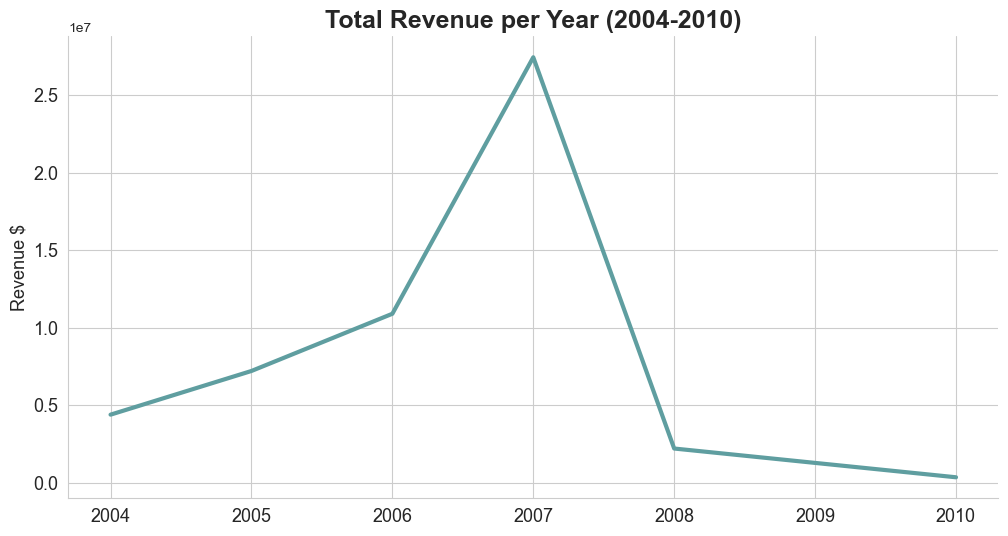

In [228]:
# override the default matplotlib style, opting for a white grid layout.
sns.set_style("whitegrid")

# generate a figure that aligns aesthetically with the other visualizations.
plt.figure(figsize = (12, 6))

# A line chart will be constructed to represent revenue per year.
plt.plot(revenue_per_year['revenue$'], 
         color='#5f9ea0', 
         linewidth=3)

# the visualization includes essential chart elements like title, labels, and legends.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $", fontsize = 13)
plt.xticks(fontsize = 13) # We'll format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # y-axis label formatting

sns.despine() # remove the top and right borders of the chart for a cleaner look.

# export chart as a picture
plt.savefig("total_revenue_per_year_in_M_line_chart.png")

plt.show() # display the visualization.

In [165]:
# Issues:
# 1. Revenue figures are displayed in scientific notation, which is not readily interpretable.
# 2. The year 2009 lacks its own tick mark, due to its absence from the revenue_per_year dataframe.

# Currently, revenue is represented in dollars, but the figures are large and overwhelming.
# For a cleaner, more comprehensible visualization, I present the revenue in thousands or millions.
# create a new Series named 'revenue$inM'.
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$'] / 1000000

In [167]:
revenue_per_year

,revenue$,revenue$inM
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [171]:
revenue_per_year_adj = revenue_per_year.copy() 

# Adding a new row for the year 2009 with 0 revenue.
new_row = pd.DataFrame({'revenue$': [0], 'revenue$inM': [0]}, index=['2009'])
revenue_per_year_adj = pd.concat([revenue_per_year_adj, new_row])

# Adjusting the index to include 2009.
revenue_per_year_adj.index = ['2004','2005','2006','2007','2008','2010','2009']

# Reordering the dataframe to chronologically arrange the years.
revenue_per_year_adj = revenue_per_year_adj.loc[['2004','2005','2006','2007','2008','2009','2010']]

revenue_per_year_adj

,revenue$,revenue$inM
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,0.00,0.000000
2010,357538.20,0.357538


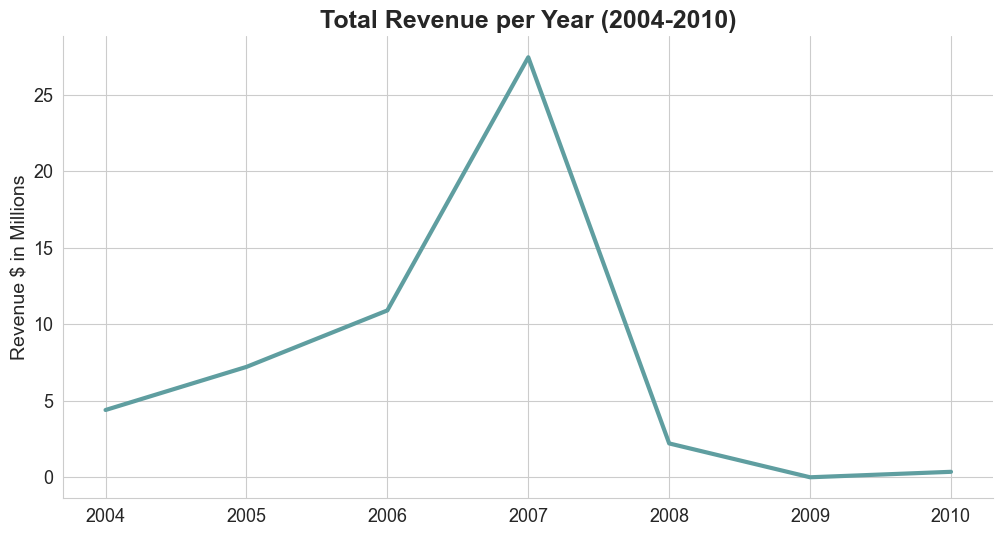

In [226]:
# plot with the adjusted data.

sns.set_style("whitegrid") # Apply a whitegrid style to override the default matplotlib style, keeping the grid for clarity.

plt.figure(figsize = (12, 6)) # Initiate a figure of appropriate size to match our other figures.

# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj['revenue$inM'], 
         color='#5f9ea0', 
         linewidth=3)

# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) # Format the labels for the x-axis.
plt.yticks(fontsize = 13) # Format the y-axis labels.

sns.despine() # Remove the top and right border of the chart for a cleaner look.

plt.savefig("total_revenue_per_year_in_M_line_chart.png") # Export the chart as an image file.

plt.show() # Display the chart.

## Yearly Sales Distribution Across Buildings (Stacked Area Chart)
We're going to create a stacked area chart that displays the distribution of yearly sales across various buildings. Follow these step-by-step instructions:
1. <strong>Initialize a checkpoint dataframe:</strong> Establish a new variable named <strong>data_stacked_area</strong> which will be our checkpoint for further computations.
2.  <strong>Formulate building indicators:</strong> Construct indicator (or dummy) variables rooted in <strong>building</strong>. These can be stored directly in data_stacked_area. An alternate approach involves two steps: creating a separate <strong>building_dummies</strong> variable, and then appending it to <strong>data_stacked_area</strong>.
3. <strong>Redefine column names:</strong> Amend the names of the dummy variables to be more descriptive. Simple labels such as 'building1', 'building2', etc. should work well.
4. <strong>Exclude unsold properties:</strong> Remove all properties from the dataset that haven't been sold.
5. <strong>Generate a yearly breakdown:</strong> Develop a breakdown by year for the 5 building dummy variables. This will yield a yearly sales distribution per building.
6. <strong>Create a stacked area chart:</strong> With the data prepared, it's time to create the stacked area chart: 
    - Background: Opt for a white background with a grid.
    - Figure size: Set the dimensions as (12,6).
    - Color scheme: Use a 5-color scheme, with colors that distinctly represent the 5 buildings. 
    - Edgecolor: This should be none.
    - Legend: Include a legend that maps the colors to their corresponding labels.
    - Axes labels: Assign an x label and y label, both with a font size of 13.
    - Chart borders: Discard the top and right borders of the chart.
    - Save the figure: Store the final chart as a .png file on your local machine

One point to keep in mind, as we noted during the Line Chart creation, the year 2009 isn't present in the data frame we are plotting. Hence, its corresponding value (0) isn't marked. To address this, generate a new stacked area chart that includes the year 2009 as an observation.

In [178]:
# create a new data variable to preprocess the data
data_stacked_area = data.copy()

In [182]:
# The goal is to find the number of sales per year for each building.
# This requires a table with both time and building data.
# However, the information on the building is contained in one single variable, 'building'.
# So I split this into separate entities, resulting in five dummy variables.
building_dummies = pd.get_dummies(data_stacked_area['building']).astype(int)
building_dummies.head()

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [184]:
# incorporate these dummy variables into the main dataframe.
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,1,0,0,0,0


In [186]:
# rename them accordingly
data_stacked_area = data_stacked_area.rename(columns={'1':'building1',
                                                    '2':'building2',
                                                    '3':'building3',
                                                    '4':'building4',
                                                    '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,1,0,0,0,0


In [188]:
# filter out only the sold apartments, as they are the only ones of interest.
data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]

In [190]:
# to make the breakdown by year and by bulding
# include the 'year_sale' variable and all the bulding dummies
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

# the result is the data per year and per building

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


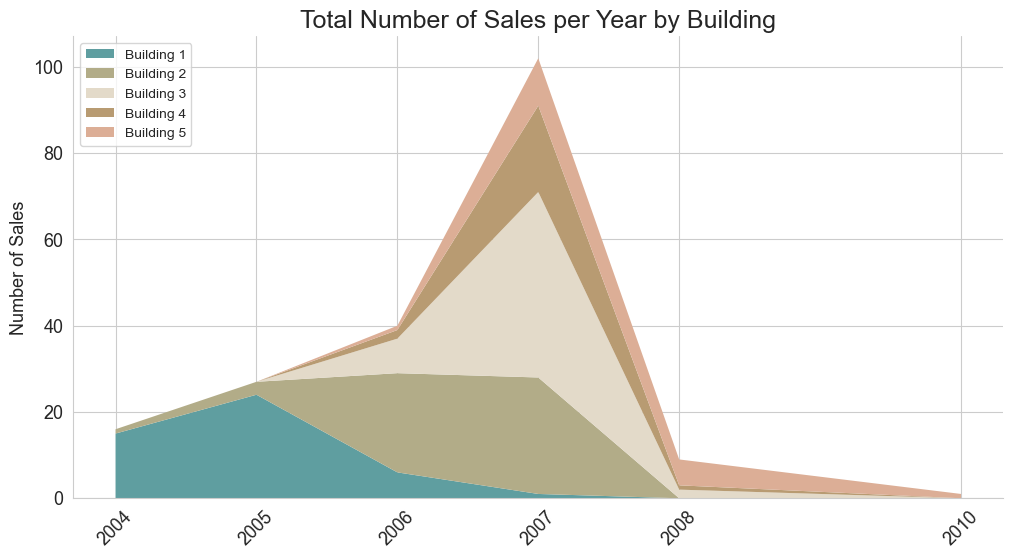

In [222]:
# choose different colors for each of the buldings
# assign unique colors for each of the buildings to differentiate them on the plot.
colors = colors = ["#5f9ea0", "#b2ac88", "#e3dac9", '#b89b72', '#dcae96']

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show()

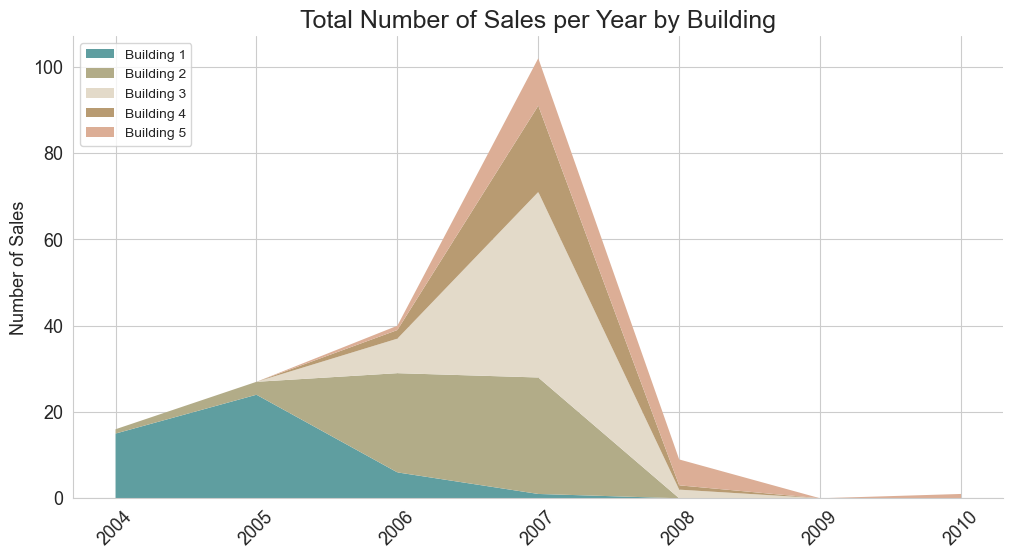

In [224]:
# To include 2009 in the graph, we need to adjust the dataframe.

# Copy the original dataframe to maintain its integrity.
stacked_area_adj = stacked_area.copy() 

new_row = pd.DataFrame({'building1': [0], 
                        "building2": [0], 
                        "building3": [0],
                        "building4": [0],
                        "building5": [0]}, index=['2009'])


# Use pd.concat to append the new row.
stacked_area_adj = pd.concat([stacked_area_adj, new_row])

# Adjust the index to include 2009 and sort it to ensure the years are in order.
stacked_area_adj.index = ['2004','2005','2006','2007','2008','2010','2009']
stacked_area_adj = stacked_area_adj.loc[['2004','2005','2006','2007','2008','2009','2010']]


######################################################################################################

# Assign unique colors to each building for differentiation.
colors = ["#5f9ea0", "#b2ac88", "#e3dac9", '#b89b72', '#dcae96']

# Define a list of labels for the legend. 
# These should match the order of the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Use seaborn's 'whitegrid' style for a clean background and grid lines.
sns.set_style("whitegrid")

# Create a figure that aligns with the dimensions of previous figures.
plt.figure(figsize = (12, 6))

# Generate the stacked area plot.
plt.stackplot(stacked_area_adj.index, # The x-axis uses the index (the year).
              stacked_area_adj['building1'],
              stacked_area_adj['building2'],
              stacked_area_adj['building3'],
              stacked_area_adj['building4'],
              stacked_area_adj['building5'],
              colors = colors,
              edgecolor = 'none')

# Format the ticks and add a legend.
plt.xticks(stacked_area_adj.index, rotation = 45) # Rotate x-axis labels by 45 degrees for clarity.
plt.legend(labels = labels, loc = "upper left") # Add a legend, specifying its position on the chart.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13) # Format the x-axis labels.
plt.yticks(fontsize = 13) # Format the y-axis labels.

# Set the title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove the top and right borders of the chart for a clean appearance.
sns.despine()

# Save the chart as an image for future use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart_v2.png")

# Display the chart.
plt.show()